## Analyzing the difference between 1p1v and NGA when 'influencers' are involved.
'Influencers' can be thought of either political parties, disinformation spreaders, or just friends and family influencing each other.
Influencers have a range, and strength.  Range is essentially how far away from the influencer can the voting agent be with his utilities. In real life, people are more likely to let themselves be influenced by people with similar views. This is modeled by only agents within the utility range of the influencer may be influenced.  The other variable is strength, which is how much are the voting agents influenced by the influencer. 

We will be comparing the percentage of efficient outcomes between 1p1v and NGA, given a range and strength. 

In [43]:
import pandas as pd
import numpy

# Read csv from Behavior Space experiment
df =  pd.read_csv("NGA-influenced-table.csv")

# Parse vectors
df["Total Utility"] = df["Total Utility"].apply(lambda array: numpy.fromstring(array[1:-1], sep = ' ', dtype = float))  
df["Social Policy Vector"] = df["Social Policy Vector"].apply(lambda array: numpy.fromstring(array[1:-1], sep = ' ', dtype = float))  


In [44]:

# Find every combination of Population, Step Size and Proportion of Strategic voters
Percentages = df[["Influencer Range", "Influencer Strength", "NGA?"]].drop_duplicates()
Percentages = pd.concat([Percentages, pd.DataFrame(columns = ["% Efficient Outcome"])], sort = True)

# Find the percentages of positive payoffs for each combination
groups = df.groupby(["Influencer Range", "Influencer Strength", "NGA?"])

firstitem = lambda d : d.apply(lambda x: int(x[0]))
seconditem = lambda d : d.apply(lambda x: int(x[1]))

for params, group in groups:
    # Calculate the percentages of runs that have at least one of the directions of the utility be positive, and the percentage of runs that have both directions be positve
    NumberOfRuns = group["Total Utility"].size
    NumberOfEfficientOutcomes = pd.to_numeric((firstitem(group["Total Utility"]) > 0) & (seconditem(group["Total Utility"]) > 1)).sum()
    PercentageEfficient = NumberOfEfficientOutcomes / NumberOfRuns * 100
    
    # Find the index in percentages to send, and input the Percentages.
    EditingIndex = Percentages[(Percentages["Influencer Range"] == params[0]) &
                (Percentages["Influencer Strength"] == params[1]) &
                (Percentages["NGA?"] == params[2])].index[0]
    Percentages.loc[EditingIndex, "% Efficient Outcome"] = PercentageEfficient
Percentages

,% Efficient Outcome,Influencer Range,Influencer Strength,NGA?
0,93.9,20.0,0.1,TRUE
997,88.6,20.0,0.2,TRUE
2000,81.5,20.0,0.3,TRUE
3000,78,20.0,0.4,TRUE
3993,73,20.0,0.5,TRUE
4998,72.4,20.0,0.6,TRUE
6000,70,20.0,0.7,TRUE
7000,60.7,20.0,0.8,TRUE
7998,63.3,20.0,0.9,TRUE
9000,58.3,20.0,1.0,TRUE


In [49]:
Ranges = list(map(lambda value: float(value), Percentages["Influencer Range"].drop_duplicates().sort_values()))
Strengths = list(map(lambda value: float(value), Percentages["Influencer Strength"].drop_duplicates().sort_values()))

# NGAPercentages = Percentages[Percentages["NGA?"]]
NGAPercentages = []
# OPOVPercentages = Percentages[~ Percentages["NGA?"]]
OPOVPercentages = []

for index in range(len(Ranges)):
    # Make new List, and add each percentage to it for a given PSV
    NGAPercentages.append([])
    OPOVPercentages.append([])
    for strength in Strengths:
        NGAPercentages[int(index)].append(Percentages[(Percentages["Influencer Strength"] == strength) & 
                                                (Percentages["Influencer Range"] == Ranges[index]) & 
                                          Percentages["NGA?"]]
                                                 ["% Efficient Outcome"].get_values()[0])
        OPOVPercentages[int(index)].append(Percentages[(Percentages["Influencer Strength"] == strength) & 
                                                (Percentages["Influencer Range"] == Ranges[index]) & (~ Percentages["NGA?"])]
                                                 ["% Efficient Outcome"].get_values()[0])



pydev debugger: warning: trying to add breakpoint to file that does not exist: c:\nga influencers.ipynb (will have no effect)


TypeError: bad operand type for unary ~: 'str'

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

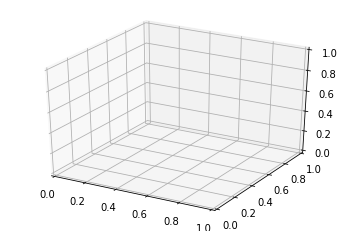

In [46]:

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# Marked as unused, but needed to register '3d' projection
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.gca(projection = '3d')

# Set font size and constants
SMALL_FONT = FontProperties().set_size('small')
TITLE = 'Percentage of elections with efficient outcomes vs. Influencer Strength and Range'
XLABEL = 'influencer Strength'
YLABEL = '% of Efficient Outcomes'

NGAColor = lambda range: (1 - (range - 20)/20,(range - 20)/20, 0)
OPOVColor = lambda range: (1 - (range - 20)/20, .5, (range - 20)/20)

# NGA and OPOV are in separate for loops, so the legend is in a better order
for index in range(len(Ranges)):
    y = NGAPercentages[index]
    x = Strengths
    
    ax.plot(x, y, zs = 0, zdir = 'y', color = NGAColor(Ranges[index]), label = "NGA, Influencer Range "+str(Ranges[index]))
1
for index in range(len(Ranges)):
    y = OPOVPercentages[index]
    x = Strengths
    
    ax.plot(x, y, zs = 1, zdir = 'y', color = OPOVColor(Ranges[index]), label = "1p1v, Influencer Range "+str(Ranges[index]))
    
plt.legend(bbox_to_anchor= (1,1), prop = SMALL_FONT)
plt.xlabel(XLABEL)
ax.set_zlabel(YLABEL)
ax.get_yaxis().set_visible(False)
plt.gcf().subplots_adjust(top = 1.25, bottom = 0, right = 1.15)
plt.show()